# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [32]:
# Model CAPM as a simple linear regression

In [33]:
from scipy import stats

In [34]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    result : ``LinregressResult`` instance
        The return value is an object with the following attributes:
    
        slope : float
            Slope of the regression line.
        intercept : float
            Intercept of the regression line.
        rvalue : float
            Correlati

In [35]:
import pandas as pd

In [36]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()

In [37]:
spy_etf = pdr.get_data_yahoo('SPY',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [38]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2010-01-04 to 2017-07-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1897 non-null   float64
 1   High       1897 non-null   float64
 2   Low        1897 non-null   float64
 3   Close      1897 non-null   float64
 4   Adj Close  1897 non-null   float64
 5   Volume     1897 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.7 KB


In [39]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,90.205032,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,90.443787,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,90.507462,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,90.889503,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,91.191994,126402800


In [40]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [41]:
aapl = pdr.get_data_yahoo('AAPL',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [42]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553027,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459940,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490867,447610800


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

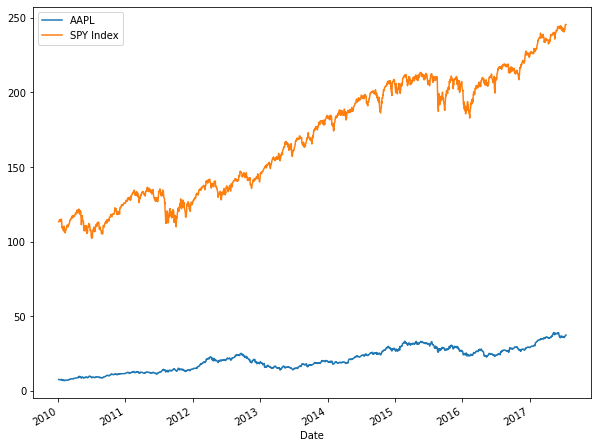

In [44]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [45]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

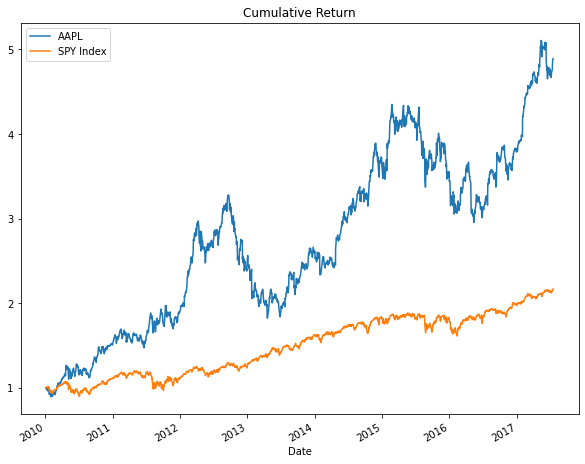

In [46]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [47]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

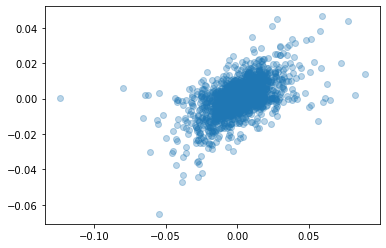

In [48]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

<AxesSubplot:>

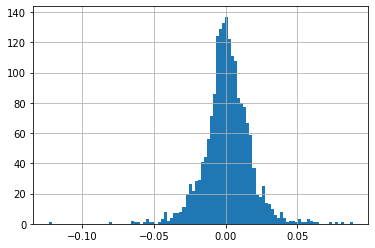

In [49]:
aapl['Daily Return'].hist(bins=100)

<AxesSubplot:>

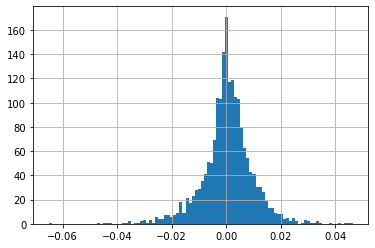

In [50]:
spy_etf['Daily Return'].hist(bins=100)

In [51]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [52]:
beta

0.3257222619724368

In [53]:
alpha

0.00013737977352059965

In [54]:
r_value

0.5556610796468161

## What if our stock was completely related to SP500?

In [55]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [56]:
import numpy as np

In [57]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [58]:
noise

array([-0.00036685, -0.0026239 ,  0.00057541, ...,  0.00049704,
        0.00149158,  0.00066769])

In [59]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-05    0.002280
2010-01-06   -0.001920
2010-01-07    0.004797
2010-01-08    0.003727
2010-01-11    0.001537
                ...   
2017-07-11    0.000999
2017-07-12    0.005099
2017-07-13    0.002177
2017-07-14    0.006156
2017-07-17    0.000546
Name: Daily Return, Length: 1896, dtype: float64

In [60]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [61]:
beta

0.9924269961142397

In [62]:
alpha

2.1209473247549662e-05

Looks like our understanding is correct!